<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 15px; height: 80px">

# Project 2

### Exploratory Data Analysis (EDA)

---

Your hometown mayor just created a new data analysis team to give policy advice, and the administration recruited _you_ via LinkedIn to join it. Unfortunately, due to budget constraints, for now the "team" is just you...

The mayor wants to start a new initiative to move the needle on one of two separate issues: high school education outcomes, or drug abuse in the community.

Also unfortunately, that is the entirety of what you've been told. And the mayor just went on a lobbyist-funded fact-finding trip in the Bahamas. In the meantime, you got your hands on two national datasets: one on SAT scores by state, and one on drug use by age. Start exploring these to look for useful patterns and possible hypotheses!

---

This project is focused on exploratory data analysis, aka "EDA". EDA is an essential part of the data science analysis pipeline. Failure to perform EDA before modeling is almost guaranteed to lead to bad models and faulty conclusions. What you do in this project are good practices for all projects going forward, especially those after this bootcamp!

This lab includes a variety of plotting problems. Much of the plotting code will be left up to you to find either in the lecture notes, or if not there, online. There are massive amounts of code snippets either in documentation or sites like [Stack Overflow](https://stackoverflow.com/search?q=%5Bpython%5D+seaborn) that have almost certainly done what you are trying to do.

**Get used to googling for code!** You will use it every single day as a data scientist, especially for visualization and plotting.

#### Package imports

In [1]:
import numpy as np
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# this line tells jupyter notebook to put the plots in the notebook rather than saving them to file.
%matplotlib inline

# this line makes plots prettier on mac retina screens. If you don't have one it shouldn't do anything.
%config InlineBackend.figure_format = 'retina'

In [2]:
# Because I liked it so much, I am using pretty print in this lab again!
from pprint import  pprint

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 1. Load the `sat_scores.csv` dataset and describe it

---

NOTE: All CSVs are in the same directory as this notebook

In [3]:
df_sat = pd.read_csv('sat_scores.csv')

In [4]:
print('df_sat.shape = ', df_sat.shape)
print('df_sat.columns = ')
df_sat.head()

df_sat.shape =  (52, 4)
df_sat.columns = 


,State,Rate,Verbal,Math
0,CT,82,509,510
1,NJ,81,499,513
2,MA,79,511,515
3,NY,77,495,505
4,NH,72,520,516


The sat_scores.csv was read by and loaded into a DataFrame, `df_sat`, which provides very useful methods for getting looking at the structure of the data.  From the `DataFrame.shape` medthod, we see that the  that the table consists of 52 rows and 4 columns. The columns are : 
  - `State`, US state where data was collected 
  - `Rate`,  participation rate in each state (%)
  - `Verbal`, average Verbal score for that state 
  - `Math`, average Math score for that state 

---

#### Note : 
Lacking the necessary information, I am only **assuming** that the `Verbal`, and `Math` columns represent average values.  It could also be the median, or even the mode, but I'm going to go with average.  In a similar fashion, I am **assuming** that the `Rate` column is talking about participation rates, that is :
<br> <br>
$$\text{Rate} = \frac{\text{Number of students who took the SAT's}}{\text{Number of Students Eligible to take the SAT's}}$$

<br>
<br>
I would also like to point out that it is a bit weird that there are 52 rows. Unless I am going crazy, there are only 50 states in the US.  So there might be some repeated states or something else.  Thankfully the DataFrame isn't very big so we can take a closer look by grouping same states together, counting the occurences of each state and checking manually.

---

In [5]:
df_sat.groupby('State').count()

,Rate,Verbal,Math
State,,,
AK,1,1,1
AL,1,1,1
AR,1,1,1
AZ,1,1,1
All,1,1,1
CA,1,1,1
CO,1,1,1
CT,1,1,1
DC,1,1,1


Alright, there are no repeated states, but there is a row for `All` which I assume is the average scores and rates for the entire country.  There is also a row for Washington DC. (DC), which is it's own thing I guess. 

Moving along with the description, with pandas we can also get summary statistics of numerical columns in the DataFrame using the `.describe()` method :

In [6]:
df_sat.describe()

,Rate,Verbal,Math
count,52.000000,52.000000,52.000000
mean,37.153846,532.019231,531.500000
std,27.301788,33.236225,36.014975
min,4.000000,482.000000,439.000000
25%,9.000000,501.000000,504.000000
50%,33.500000,526.500000,521.000000
75%,63.500000,562.000000,555.750000
max,82.000000,593.000000,603.000000


With this we quickly see the count, mean, standard deviation, etc... for each numerical column.  In these cases the results make sense, but it is important to note that certain numerical values don't make sense to get statistics on.  For example, the average ID number of employees in a company does not mean a thing.

### 1.1 Make a pandas DataFrame object with pandas `.read_csv()` function

Take a look at the `.dtypes` attribute in the DataFrame. 

I already used pandas to read in the file in the previous section, but we can still look at the data types:

In [7]:
df_sat.dtypes

State     object
Rate       int64
Verbal     int64
Math       int64
dtype: object

We get integer value (specifically, Int64) types for all the numerical columns (which makes sense), and an object type for the `State` column.  The dtype for the state column is really a string object, but for some reason pandas does not specify that. 

### 1.2 Look at the first ten rows of the DataFrame: what does our data describe?

From now on, use the DataFrame loaded from the file using the `.read_csv()` function.

Use the `.head(num)` built-in DataFrame function, where `num` is the number of rows to print out.

You are not given a "codebook" with this data, so you will have to make some (very minor) inference.

In [8]:
df_sat.head(10)

,State,Rate,Verbal,Math
0,CT,82,509,510
1,NJ,81,499,513
2,MA,79,511,515
3,NY,77,495,505
4,NH,72,520,516
5,RI,71,501,499
6,PA,71,500,499
7,VT,69,511,506
8,ME,69,506,500
9,VA,68,510,501


I've already described the Data in section 1.0, but here's the break down again : 

 - State, US state for which the data was collected + 
     1 Row for the entire country (`All`) + 1 row for Washington DC (`DC`)
 - Rate, participation rate in each state (%)
 - Verbal, average Verbal score
 - Math, average Math score

I'll take this opportunity to restate and emphasize the fact that I am making assumptions about what the columns represent because it is never specified.  These assumptions are that `Rate` is the participation rate, `Math` and `Verbal` are the *average* score in each of those categories.   

### Change :
Before continuing, I would like to change the column index.  The State column would be perfect for referecing specific rows (it makes more sense than a number.

In [9]:
# Set data frame index to the State column
df_sat.set_index('State', inplace=True)
df_sat.head()

,Rate,Verbal,Math
State,,,
CT,82,509,510
NJ,81,499,513
MA,79,511,515
NY,77,495,505
NH,72,520,516


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 2. Create a "data dictionary" based on the data

---

A data dictionary is an object that describes your data. This should contain the name of each variable (column), the type of the variable, your description of what the variable is, and the shape (rows and columns) of the entire dataset.

### Answer : 
To recap (mostly for myself) the general structure of the data dictionary is : 
   
  ```
      data_dictionary = { column_name : { 
                                          dtype : variable type,
                                          description : "some string describing the variable"
                                        } 
                          shape       : (Number of rows, Number of columns)
                        }
  ```
  
The `type` of the actual dictionary entries are as follows : 
 - `dtype` : numpy.dtype
 - `description` : string (str)
 - `shape`       : tuple of ints
 
Luckily, pandas dataframes have a to_dict() method.  So we can start from there.

In [10]:
# Get dictionary of columns : dtypes 
column_dict = df_sat.dtypes.to_dict()

# The issue with this is that the string is only listed as type "object", so let's change that :
column_dict['State'] = np.dtype(str)
pprint(column_dict)

{'Math': dtype('int64'),
 'Rate': dtype('int64'),
 'State': dtype('<U'),
 'Verbal': dtype('int64')}


---
### Note : 
Before building on top of this dictionary, I would like to point out that the `numpy.dtype` result for the string prints as $\lt$`U`.  The `U` stands for *Unicode*, and from wikipedia : 
<br>
<br>
*Unicode is a computing industry standard for the consistent encoding, representation, and handling of text expressed in most of the world's writing systems.*
<br>
<br>
So the dtype is indeed a string (text).

---

Sorry about the side note, and back to the dictionary! Here's what we have so far : 
<br>
<br>
`column_dict = {column_name : dtype}`
<br>
<br>
To finish the column dictionary, which is a sub dictionary of the data one, we just need to add the key-value pairs for the descriptions.  The value associated to the column name right now is just a value.  We need to turn that into a dictionary so that it can also hold the description.

In [11]:
# Convert dtype values in column_dict to a {'dtype' : dtype} dicitonary. 
for k,v in column_dict.items():
    column_dict[k] = {'dtype' : v}
pprint(column_dict)

{'Math': {'dtype': dtype('int64')},
 'Rate': {'dtype': dtype('int64')},
 'State': {'dtype': dtype('<U')},
 'Verbal': {'dtype': dtype('int64')}}


Now we have to update those dictionaries with the appropriate description :

In [12]:
# Update column_dictionaries with descriptions.
column_dict['State'].update({'description' : "US states (abbreviated), also includes a row for All states (All), and for Washington DC (DC)"""})
column_dict['Math'].update({'description' : "Average Math SAT score"})
column_dict['Verbal'].update({'description' : "Average Verbal SAT score"})
column_dict['Rate'].update({'description' : "SAT participation rate (%)"})
pprint(column_dict)

{'Math': {'description': 'Average Math SAT score', 'dtype': dtype('int64')},
 'Rate': {'description': 'SAT participation rate (%)', 'dtype': dtype('int64')},
 'State': {'description': 'US states (abbreviated), also includes a row for '
                          'All states (All), and for Washington DC (DC)',
           'dtype': dtype('<U')},
 'Verbal': {'description': 'Average Verbal SAT score', 'dtype': dtype('int64')}}


Now that we have sub-dictionaries for all columns, we can create the main one, including the shape of the data frame.

In [13]:
# Create main Data Dictionary with sub-dict of column info, and dataframe shape
column_dict.update({'shape' : df_sat.shape})
sat_data_dict = column_dict

#### Check our work : 

In [14]:
print('sat_data_dict : \n\n')
pprint(sat_data_dict)

sat_data_dict : 


{'Math': {'description': 'Average Math SAT score', 'dtype': dtype('int64')},
 'Rate': {'description': 'SAT participation rate (%)', 'dtype': dtype('int64')},
 'State': {'description': 'US states (abbreviated), also includes a row for '
                          'All states (All), and for Washington DC (DC)',
           'dtype': dtype('<U')},
 'Verbal': {'description': 'Average Verbal SAT score', 'dtype': dtype('int64')},
 'shape': (52, 3)}


Everything seems to be in order.

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 3. Plot the data using seaborn

---

### 3.1 Using seaborn's `distplot`, plot the distributions for each of `Rate`, `Math`, and `Verbal`

Set the keyword argument `kde=False`. This way you can actually see the counts within bins. You can adjust the number of bins to your liking. 

[Please read over the `distplot` documentation to learn about the arguments and fine-tune your chart if you want.](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.distplot.html#seaborn.distplot)

---
### Note : 
I have consulted the distplot documentation, and seems to me like we can't really do that much in terms of tweeking.  Luckily, seaborn plots return *matplotlib* axes.  So for this section, I will be doing the basic plot with seaborn as instructed, but using matplotlib commmands for the tweeking. 

---

For starters in this section, I will define some font dictionaries so that I can tweek the text as I see fit : 

In [15]:
# Define Font dictionary for axis labels
font_axes = {'family': 'DejaVu Sans',
            'color':  'black',
            'weight': 'normal',
            'size': 14,
            }

font_title = {'family': 'DejaVu Sans',
            'color':  'black',
            'weight': 'bold',
            'size': 16,
            }

### Participation Rate Distribution, `Rate`

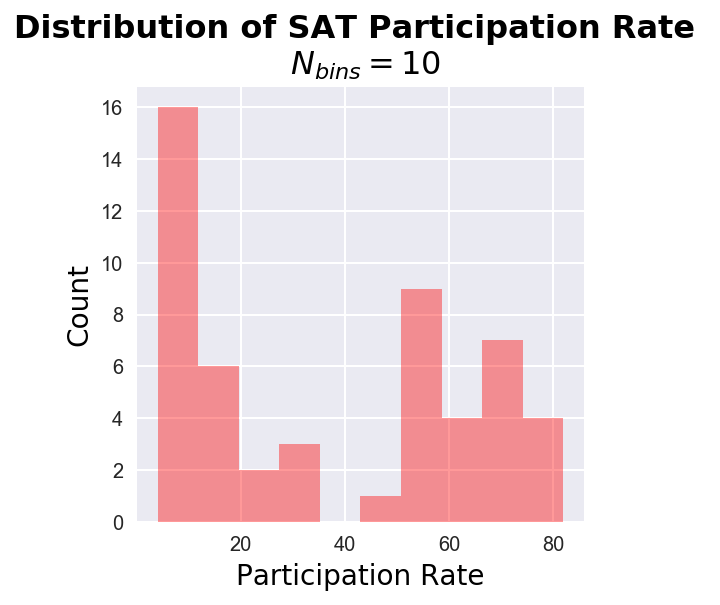

In [16]:
# Initialize figure, and axis to have them as objects.
fig_rate, ax_rate = plt.subplots(nrows=1,ncols=1, figsize=(4,4))

# Use seaborn to make a histogram (distplot) of the data in the column
sns.distplot(df_sat['Rate'],kde=False, bins=10, color='red', ax=ax_rate)

# Tweek plot (x/y labels, and add title)
ax_rate.set_xlabel('Participation Rate', fontdict=font_axes)
ax_rate.set_ylabel('Count', fontdict=font_axes)
ax_rate.set_title('Distribution of SAT Participation Rate \n $N_{bins} = 10$', fontdict=font_title)

The participation rate distribution shows two peaks, with not much in between.  Surprisingly, the bin with the most counts corresponds to the lowest participation rates.  16 States with only about 10%  of the students taking the SATs is pretty shocking..

### Math Score Distribution, `Math`

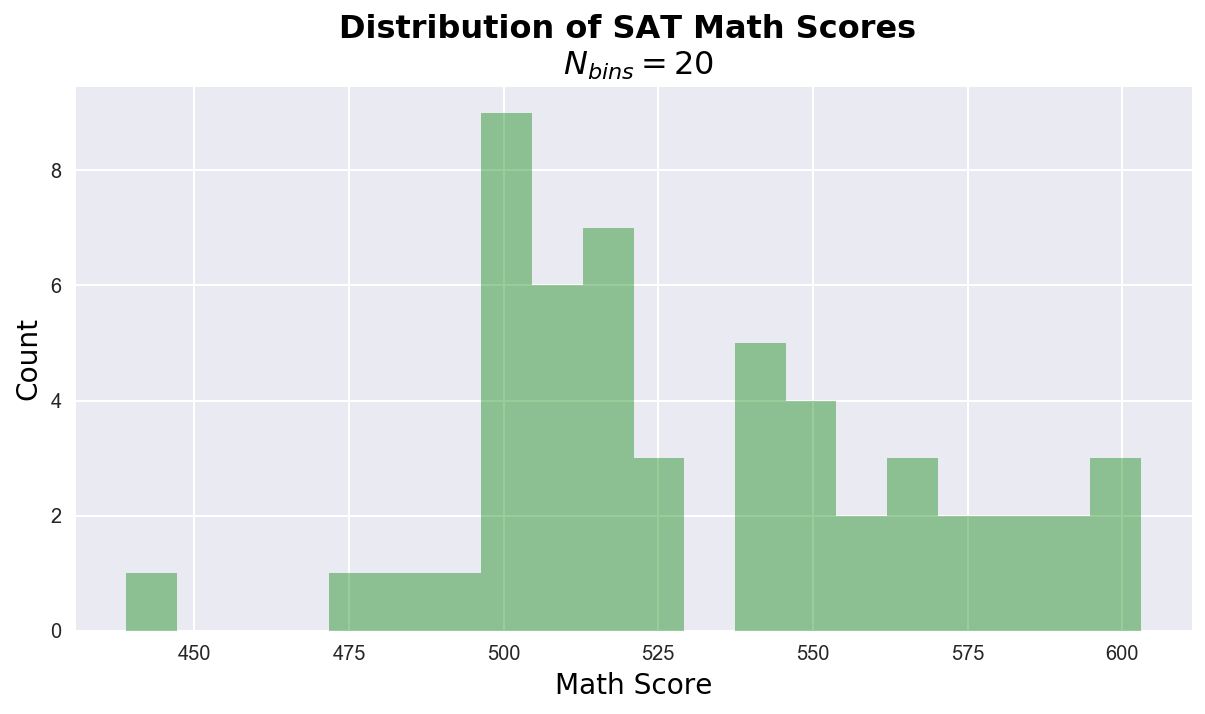

In [17]:
# Initialize figure and axis to have them as objects.
fig_math, ax_math = plt.subplots(nrows=1,ncols=1, figsize=(10,5))

# Use seaborn to make a histogram (distplot) of the data in the column
sns.distplot(df_sat['Math'], kde=False, bins=20, color='green', ax=ax_math)

# Tweek axis labels and add title
ax_math.set_xlabel('Math Score', fontdict=font_axes)
ax_math.set_ylabel('Count', fontdict=font_axes)
ax_math.set_title('Distribution of SAT Math Scores \n $N_{bins} = 20$', fontdict=font_title)

### Verbal Score Distribution, `Verbal`

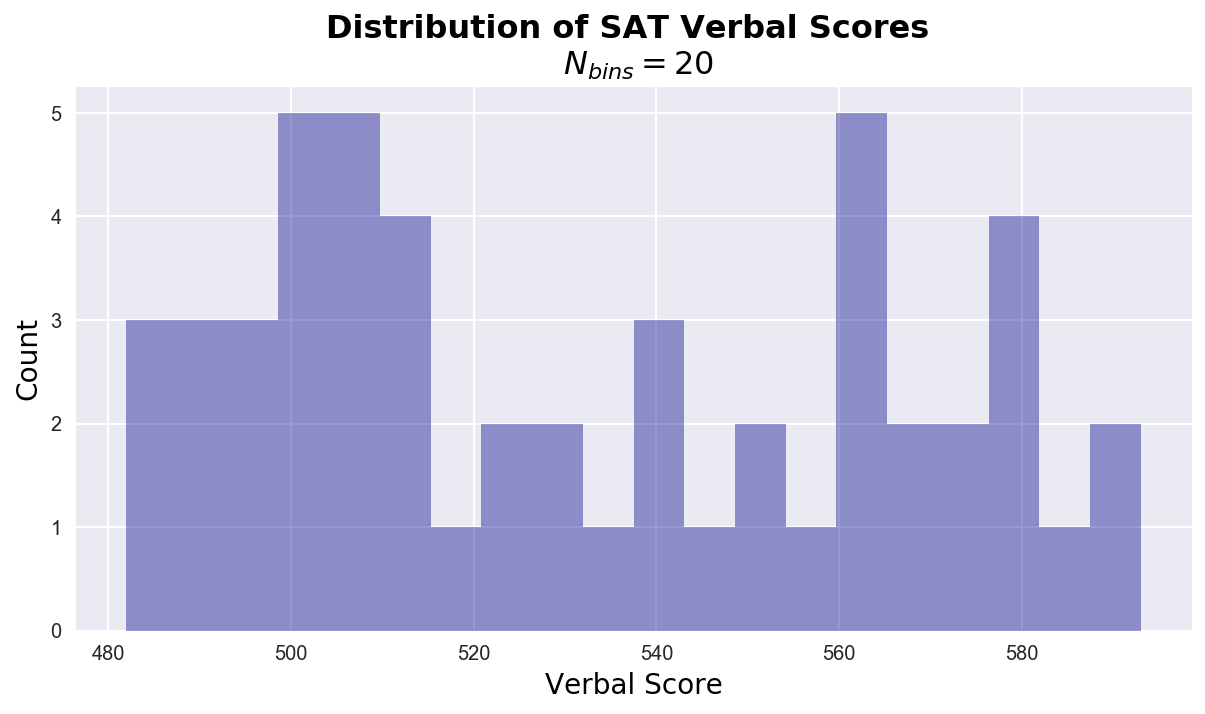

In [18]:
# declare figure and axis to get them as objects.
fig_verb, ax_verb = plt.subplots(nrows=1,ncols=1, figsize=(10,5))

# Use seaborn to make a histogram (distplot) of the data in the column.
sns.distplot(df_sat['Verbal'], kde=False, bins=20, color='darkblue', ax=ax_verb)

# Tweek axis labels, and add title
ax_verb.set_xlabel('Verbal Score', fontdict=font_axes)
ax_verb.set_ylabel('Count', fontdict=font_axes)
ax_verb.set_title('Distribution of SAT Verbal Scores \n $N_{bins} = 20$', fontdict=font_title)

### 3.2 Using seaborn's `pairplot`, show the joint distributions for each of `Rate`, `Math`, and `Verbal`

Explain what the visualization tells you about your data.

[Please read over the `pairplot` documentation to fine-tune your chart.](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.pairplot.html#seaborn.pairplot)


#### Note : 
Tweeking a PairGrid object seems to be pretty limited.  So I am just leaving it as is.  I did add a hue by state, which comes with a legend.  It's not very useful, but it sure is pretty! (except that the legend is way too long!)

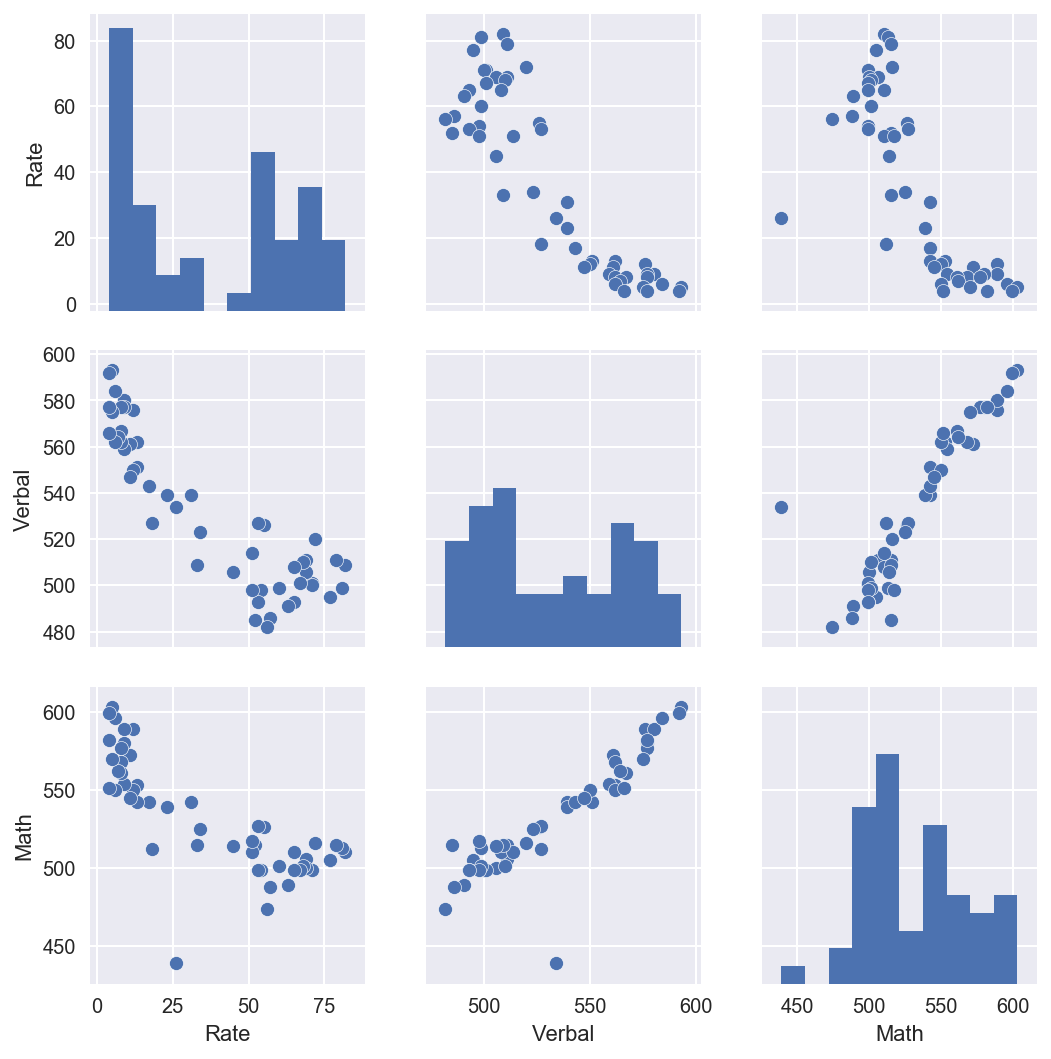

In [23]:
# Use pairplot to get a grid of scatter plots for each column in the Dataframe.  Except for diagonal which shows
# their distribution.
sns.pairplot(df_sat,palette='cool')

#### What does this visualization tell us about the data?

Beyond the distributions, which we've talked about previously. We can see from the scatter plots that all three variables : `Rate`, `Verbal`, and `Math` are all correlated to each other.  `Verbal` and `Math` scores seem to have a positive correlation, while `Rate` is negatively correlated to both of those.  It is interesting to see how tightly correlated `Math` and `Verbal` scores are.  The data shows very little spread (aside from one point), and almost all fits on a line.  Eyeballing it, it seems that the slope of that line is pretty close to 1.
<br>
<br>
It is interesting to see the negative correlation between `Rate` and the scores.  Basically, for a given state, the more people who partcipate, the less the average score is.  This might imply that in States with low participation rate, only the Students who are doing exceptionally well academically plan to go to College.  This is a gross generalization, but it also seems  like the states with the highest scores (but lowest rates) are either farm states, or flyover (not sure how to word it).

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 4. Plot the data using built-in pandas functions.

---

Pandas is very powerful and contains a variety of nice, built-in plotting functions for your data. Read the documentation here to understand the capabilities:

http://pandas.pydata.org/pandas-docs/stable/visualization.html

### 4.1 Plot a stacked histogram with `Verbal` and `Math` using pandas

### Note : 
I think stacked histograms are a bit hard to read, so I'm comparing it to a normal one.  We lose information on the other one, but we can easily see which bin has most counts.

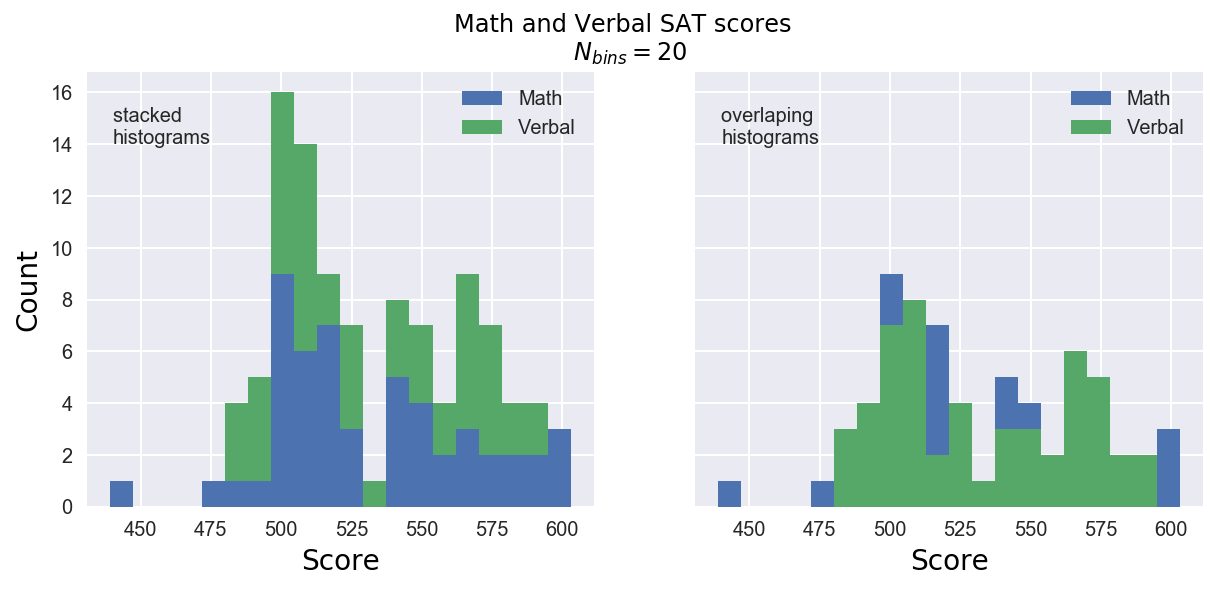

In [24]:
# Define Axis Grid
fig, (ax1, ax2) = plt.subplots(nrows=1,ncols=2, sharey=True,figsize=(10,4))

# Plot stacked=True and stacked=False versions of the histograms
df_sat[['Math', 'Verbal']].plot.hist(bins=20, stacked=True, ax=ax1)
df_sat[['Math', 'Verbal']].plot.hist(bins=20, stacked=False, ax=ax2)

# Set axis labels and title
ax1.set_xlabel('Score', fontdict=font_axes)
ax1.set_ylabel('Count', fontdict=font_axes)
ax2.set_xlabel('Score', fontdict=font_axes)
fig.suptitle('Math and Verbal SAT scores \n $N_{bins} = 20$', fontdict=font_title)

# Add text to explicitly show which plot is the stacked histogram.
ax1.text(x=440, y=14, s='stacked \nhistograms')
ax2.text(x=440, y=14, s='overlaping \nhistograms')

After looking at these side by side, it is true that we lose too much information when they are overlapping.

### 4.2 Plot `Verbal` and `Math` on the same chart using boxplots

What are the benefits of using a boxplot as compared to a scatterplot or a histogram?

What's wrong with plotting a box-plot of `Rate` on the same chart as `Math` and `Verbal`?

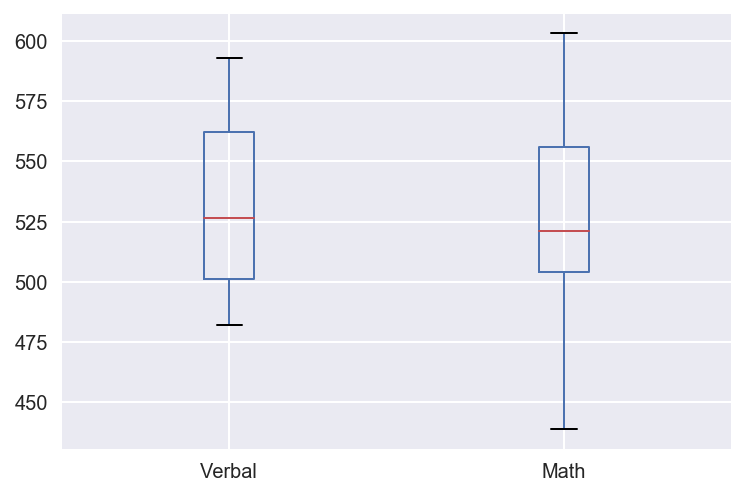

In [25]:
df_sat[['Verbal', 'Math']].plot.box()

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 4.3 Plot `Verbal`, `Math`, and `Rate` appropriately on the same boxplot chart

Think about how you might change the variables so that they would make sense on the same chart. Explain your rationale for the choices on the chart. You should strive to make the chart as intuitive as possible. 


Luckily, SAT scores have a maximum value, that means we can convert all average scores in `Math` and `Verbal` to percentages of maximum score.  That is, instead of reading : 600 points out of 800 points on the math portion of the SAT, will read 75% of the points.  So let's make a DataFrame, `df_scaled` which has all columns scaled to percentages.

In [27]:
# Create copy of SAT dataframe and scale it so that scores and 
# rates are percentages.
df_scaled = df_sat.copy()
df_scaled[['Math', 'Verbal']] *= (1./8.)
df_scaled.head()

,Rate,Verbal,Math
State,,,
CT,82,63.625,63.750
NJ,81,62.375,64.125
MA,79,63.875,64.375
NY,77,61.875,63.125
NH,72,65.000,64.500


Now that we have the scaled dataframe, let's see what it looks like when plotted.

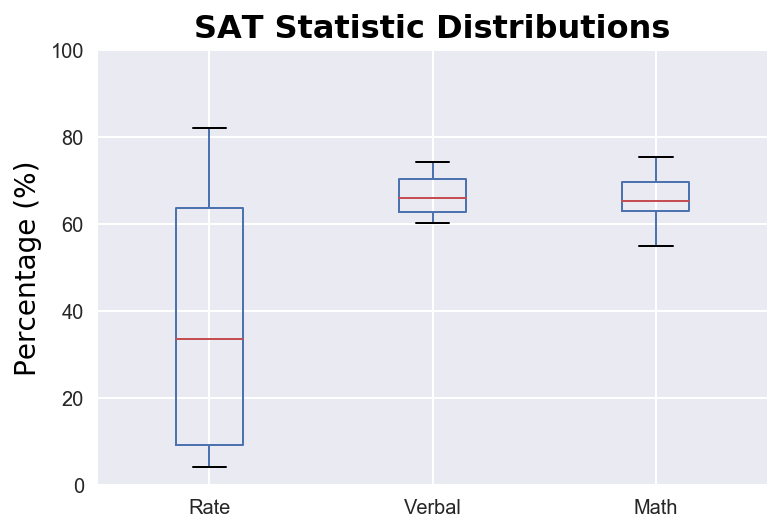

In [28]:
ax = df_scaled[['Rate', 'Verbal', 'Math']].plot.box()
ax.set_ylabel('Percentage (%)', fontdict=font_axes)
ax.set_ylim(0,100)
ax.set_title('SAT Statistic Distributions', fontdict=font_title)

---
### Note : 
Doing this has converted the data type of the `Math` and `Verbal` columns from ints to floats.  For the sake of completion, let us create a data dictionary with the correct information.

---

In [29]:
# Make a copy of the data dictionary
scaled_sat_dict = dict(sat_data_dict)

# Replace dtypes in new dict with dtypes in scaled dataframe
scaled_sat_dict['Math']['dtype']  = df_scaled.dtypes['Math']
scaled_sat_dict['Verbal']['dtype'] = df_scaled.dtypes['Verbal']

# Print to check
pprint(scaled_sat_dict)

{'Math': {'description': 'Average Math SAT score', 'dtype': dtype('float64')},
 'Rate': {'description': 'SAT participation rate (%)', 'dtype': dtype('int64')},
 'State': {'description': 'US states (abbreviated), also includes a row for '
                          'All states (All), and for Washington DC (DC)',
           'dtype': dtype('<U')},
 'Verbal': {'description': 'Average Verbal SAT score',
            'dtype': dtype('float64')},
 'shape': (52, 3)}


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 5. Create and examine subsets of the data

---

For these questions you will practice **masking** in pandas. Masking uses conditional statements to select portions of your DataFrame (through boolean operations under the hood.)

Remember the distinction between DataFrame indexing functions in pandas:

    .iloc[row, col] : row and column are specified by index, which are integers
    .loc[row, col]  : row and column are specified by string "labels" (boolean arrays are allowed; useful for rows)
    
For detailed reference and tutorial make sure to read over the pandas documentation:

http://pandas.pydata.org/pandas-docs/stable/indexing.html



### 5.1 Find the list of states that have an average `Verbal` score greater than the average of `Verbal` scores across the entire dataset

How many states are above the mean? What does this tell you about the distribution of `Verbal` scores?




---
### Note : 
Judging by the question, I guess the assumption that the values represent the mean (not the median) for each state.  So that's nice.

---
### Change : 
It does not make sense to me to tatke the average over the *entire* data set.  There is 1 row that already represents `All` values!  With this, I will the omiting that row in these calculations.  On a related note, I will not be using that row's values for the overall averages.  Assuming it represents the average values for **All** test takers.  That is not the same thing as taking the average of a set of averages.

---

Back to business, let's see what the average value was :

In [30]:
avg_verbal = np.mean(df_sat['Verbal'][df_sat.index != 'All'])
print('overall average verbal score = ' + str(avg_verbal))

overall average verbal score = 532.5294117647059


Now that we have that, let's see which states have values above that average, and also count how many are in that list : 

In [31]:
high_verbal_states = df_sat.loc[df_sat['Verbal'] > avg_verbal].index
pprint(high_verbal_states)
print('\n N states above average : ' + str(len(high_verbal_states)))

Index(['CO', 'OH', 'MT', 'ID', 'TN', 'NM', 'IL', 'KY', 'WY', 'MI', 'MN', 'KS',
       'AL', 'NE', 'OK', 'MO', 'LA', 'WI', 'AR', 'UT', 'IA', 'SD', 'ND', 'MS'],
      dtype='object', name='State')

 N states above average : 24


There are 24 states that above the mean SAT verbal score, which leads to believe that the distribution is somewhat symmetric.  This can also be seen from the histogram we made earlier.  Although it has two peaks (one high and one low), there some symmetry accross the mean.

### 5.2 Find the list of states that have a median `Verbal` score greater than the median of `Verbal` scores across the entire dataset

How does this compare to the list of states greater than the mean of `Verbal` scores? Why?

Same idea as above, let's start by getting the mean.

In [32]:
# Get median value of Verbal Scores
median_verbal = np.median(df_sat['Verbal'][df_sat.index != 'All'])
print('Median Verbal Score : {}'.format(median_verbal))

# 
upper_median_verbal = df_sat.loc[df_sat['Verbal'] > median_verbal].index
pprint(upper_median_verbal)
print('\n N States Above Median : ' + str(len(upper_median_verbal)))



Median Verbal Score : 527.0
Index(['CO', 'OH', 'MT', 'ID', 'TN', 'NM', 'IL', 'KY', 'WY', 'MI', 'MN', 'KS',
       'AL', 'NE', 'OK', 'MO', 'LA', 'WI', 'AR', 'UT', 'IA', 'SD', 'ND', 'MS'],
      dtype='object', name='State')

 N States Above Median : 24


Let's compare the two : 

In [33]:
pprint(upper_median_verbal)
pprint(high_verbal_states)

Index(['CO', 'OH', 'MT', 'ID', 'TN', 'NM', 'IL', 'KY', 'WY', 'MI', 'MN', 'KS',
       'AL', 'NE', 'OK', 'MO', 'LA', 'WI', 'AR', 'UT', 'IA', 'SD', 'ND', 'MS'],
      dtype='object', name='State')
Index(['CO', 'OH', 'MT', 'ID', 'TN', 'NM', 'IL', 'KY', 'WY', 'MI', 'MN', 'KS',
       'AL', 'NE', 'OK', 'MO', 'LA', 'WI', 'AR', 'UT', 'IA', 'SD', 'ND', 'MS'],
      dtype='object', name='State')


The results are exactly the same.  Again, we have a very symetric distribution.

### 5.3 Create a column that is the difference between the `Verbal` and `Math` scores

Specifically, this should be `Verbal - Math`.

In [34]:
df_sat['score_differential'] = df_sat['Verbal'] - df_sat['Math']
df_sat.head()

,Rate,Verbal,Math,score_differential
State,,,,
CT,82,509,510,-1
NJ,81,499,513,-14
MA,79,511,515,-4
NY,77,495,505,-10
NH,72,520,516,4


### 5.4 Create two new DataFrames showing states with the greatest difference between scores

1. Your first DataFrame should be the 10 states with the greatest gap between `Verbal` and `Math` scores where `Verbal` is greater than `Math`. It should be sorted appropriately to show the ranking of states.
2. Your second DataFrame will be the inverse: states with the greatest gap between `Verbal` and `Math` such that `Math` is greater than `Verbal`. Again, this should be sorted appropriately to show rank.
3. Print the header of both variables, only showing the top 3 states in each.

In [40]:
df_verbal = df_sat[df_sat['score_differential'] > 0].copy()
df_verbal.sort_values(by='score_differential', ascending=False, inplace=True)
df_verbal = df_verbal[0:10]
df_verbal.head(3)

,Rate,Verbal,Math,score_differential
State,,,,
OH,26,534,439,95
WV,18,527,512,15
MS,4,566,551,15


In [42]:
df_math = df_sat[df_sat['score_differential'] < 0].copy()
df_math['score_differential'] *= -1
df_math.sort_values(by='score_differential', ascending=False, inplace=True)
df_math = df_math[0:10]
df_math.head(3)

,Rate,Verbal,Math,score_differential
State,,,,
HI,52,485,515,30
CA,51,498,517,19
NJ,81,499,513,14


## 6. Examine summary statistics

---

Checking the summary statistics for data is an essential step in the EDA process!

### 6.1 Create the correlation matrix of your variables (excluding `State`).


- Use seaborn's `.heatmap` method to add some color to the matrix
- Set `annot=True`


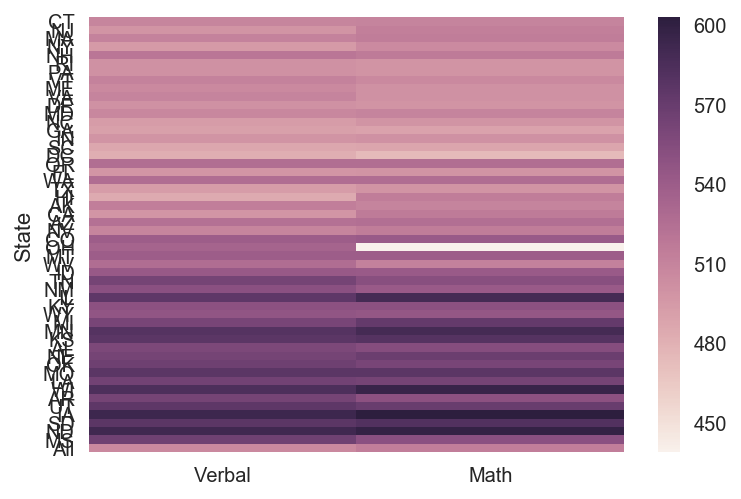

In [45]:
sns.heatmap(df_sat[['Verbal', 'Math']])

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.2 Use pandas'  `.describe()` built-in function on your DataFrame

Write up what each of the rows returned by the function indicate.

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.3 Assign and print the _covariance_ matrix for the dataset

1. Describe how the covariance matrix is different from the correlation matrix.
2. What is the process to convert the covariance into the correlation?
3. Why is the correlation matrix preferred to the covariance matrix for examining relationships in your data?

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 7. Performing EDA on "drug use by age" data.

---

You will now switch datasets to one with many more variables. This section of the project is more open-ended - use the techniques you practiced above!

We'll work with the "drug-use-by-age.csv" data, sourced from and described here: https://github.com/fivethirtyeight/data/tree/master/drug-use-by-age.

### 7.1

Load the data using pandas. Does this data require cleaning? Are variables missing? How will this affect your approach to EDA on the data?

### 7.2 Do a high-level, initial overview of the data

Get a feel for what this dataset is all about.

Use whichever techniques you'd like, including those from the SAT dataset EDA. The final response to this question should be a written description of what you infer about the dataset.

Some things to consider doing:

- Look for relationships between variables and subsets of those variables' values
- Derive new features from the ones available to help your analysis
- Visualize everything!

### 7.3 Create a testable hypothesis about this data

Requirements for the question:

1. Write a specific question you would like to answer with the data (that can be accomplished with EDA).
2. Write a description of the "deliverables": what will you report after testing/examining your hypothesis?
3. Use EDA techniques of your choice, numeric and/or visual, to look into your question.
4. Write up your report on what you have found regarding the hypothesis about the data you came up with.


Your hypothesis could be on:

- Difference of group means
- Correlations between variables
- Anything else you think is interesting, testable, and meaningful!

**Important notes:**

You should be only doing EDA _relevant to your question_ here. It is easy to go down rabbit holes trying to look at every facet of your data, and so we want you to get in the practice of specifying a hypothesis you are interested in first and scoping your work to specifically answer that question.

Some of you may want to jump ahead to "modeling" data to answer your question. This is a topic addressed in the next project and **you should not do this for this project.** We specifically want you to not do modeling to emphasize the importance of performing EDA _before_ you jump to statistical analysis.

** Question and deliverables**


...

In [2]:
# Code

**Report**



...

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 8. Introduction to dealing with outliers

---

Outliers are an interesting problem in statistics, in that there is not an agreed upon best way to define them. Subjectivity in selecting and analyzing data is a problem that will recur throughout the course.

1. Pull out the rate variable from the SAT dataset.
2. Are there outliers in the dataset? Define, in words, how you _numerically define outliers._
3. Print out the outliers in the dataset.
4. Remove the outliers from the dataset.
5. Compare the mean, median, and standard deviation of the "cleaned" data without outliers to the original. What is different about them and why?

<img src="http://imgur.com/GCAf1UX.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 9. Percentile scoring and spearman rank correlation

---

### 9.1 Calculate the spearman correlation of sat `Verbal` and `Math`

1. How does the spearman correlation compare to the pearson correlation? 
2. Describe clearly in words the process of calculating the spearman rank correlation.
  - Hint: the word "rank" is in the name of the process for a reason!


### 9.2 Percentile scoring

Look up percentile scoring of data. In other words, the conversion of numeric data to their equivalent percentile scores.

http://docs.scipy.org/doc/numpy-dev/reference/generated/numpy.percentile.html

http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.percentileofscore.html

1. Convert `Rate` to percentiles in the sat scores as a new column.
2. Show the percentile of California in `Rate`.
3. How is percentile related to the spearman rank correlation?

### 9.3 Percentiles and outliers

1. Why might percentile scoring be useful for dealing with outliers?
2. Plot the distribution of a variable of your choice from the drug use dataset.
3. Plot the same variable but percentile scored.
4. Describe the effect, visually, of coverting raw scores to percentile.